In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import urllib
import cv2
from sklearn.model_selection import train_test_split

In [2]:
df= pd.read_csv('data.csv')
df

img  stage  discharge
0    file:///C:/Users/edgar/OneDrive/Escritorio/Tec...   3.16       1240
1    file:///C:/Users/edgar/OneDrive/Escritorio/Tec...   3.17       1250
2    file:///C:/Users/edgar/OneDrive/Escritorio/Tec...   3.16       1240
3    file:///C:/Users/edgar/OneDrive/Escritorio/Tec...   3.16       1240
4    file:///C:/Users/edgar/OneDrive/Escritorio/Tec...   3.15       1220
..                                                 ...    ...        ...
333  file:///C:/Users/edgar/OneDrive/Escritorio/Tec...   2.73        524
334  file:///C:/Users/edgar/OneDrive/Escritorio/Tec...   2.72        515
335  file:///C:/Users/edgar/OneDrive/Escritorio/Tec...   2.71        506
336  file:///C:/Users/edgar/OneDrive/Escritorio/Tec...   2.69        489
337  file:///C:/Users/edgar/OneDrive/Escritorio/Tec...   2.69        489

[338 rows x 3 columns]

In [21]:
def image_processing(image_url):

#Download from image url and import it as a numpy array
    response = urllib.request.urlopen(image_url)
    image = np.asarray(bytearray(response.read()), dtype="uint8")
#Read the numpy arrays as color images in OpenCV
    image_bgr = cv2.imdecode(image, cv2.IMREAD_COLOR)
#Convert to HSV for creating a mask
    image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)
#Convert to grayscale that will actually be used for training, instead of color image 
    image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
#Create a mask that detects the red rectangular tags present in each image
    mask1 = cv2.inRange(image_hsv, (192, 192, 192), (255, 255, 255))
    mask2 = cv2.inRange(image_hsv, (0, 0, 128), (0, 255, 255))

    #mask = cv2.inRange(image_hsv, (0,0,0), (350,55,100))
    mask = cv2.bitwise_or(mask1, mask2)
#Get the coordinates of the red rectangle in the image, 
    #But take entire image if mask fails to detect the red rectangle
    if len(np.where(mask != 0)[0]) != 0:
        y1 = min(np.where(mask != 0)[0])
        y2 = max(np.where(mask != 0)[0])
    else:
        y1 = 0                                     
        y2 = len(mask)
    if len(np.where(mask != 0)[1]) != 0:
        x1 = min(np.where(mask != 0)[1])
        x2 = max(np.where(mask != 0)[1])
    else:
        x1 = 0
        x2 = len(mask[0])
#Crop the grayscle image along those coordinates
    image_cropped = image_gray[y1:y2, x1:x2]
    if image_cropped.size ==0:
        print(image_url)
        return image_cropped
    else:
    #Resize the image to 100x100 pixels size
        image_100x100 = cv2.resize(image_cropped, (100, 100))
#Save image as in form of array of 10000x1
        image_arr = image_100x100.flatten()
        return image_arr

In [22]:
from tqdm import tqdm
image_list=[]
for url in tqdm(df['img'].tolist()): #tolist()[:3000] 3000 urls is enough
    image_list.append(image_processing(url))

 63%|██████▎   | 214/338 [01:32<00:50,  2.46it/s]

file:///C:/Users/edgar/OneDrive/Escritorio/Tec/reto/images/20170724/StateLineWeir_20170812_Farrell_506.jpg


 90%|████████▉ | 304/338 [02:10<00:14,  2.33it/s]

file:///C:/Users/edgar/OneDrive/Escritorio/Tec/reto/images/20170827/StateLineWeir_20170923_Farrell_659.jpg


100%|██████████| 338/338 [02:24<00:00,  2.34it/s]


In [23]:
X = np.array(image_list)
np.save('rio_pro.npy',X/255,allow_pickle=True)
img_array = np.load('rio_pro.npy',allow_pickle=True)

<ipython-input-23-c1b346c51dc4>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(image_list)


<ipython-input-24-03a4ca23be26>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


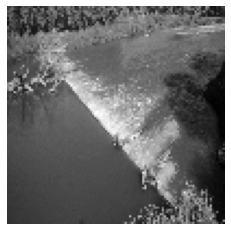

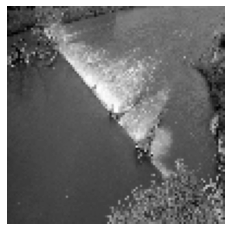

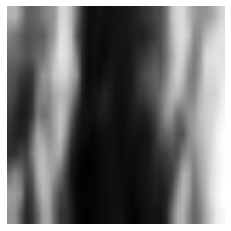

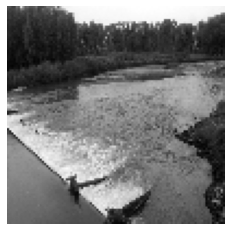

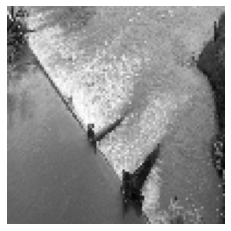

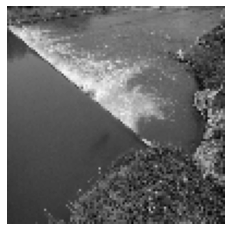

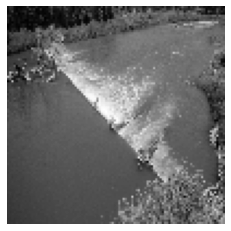

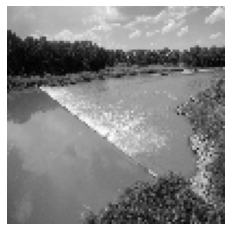

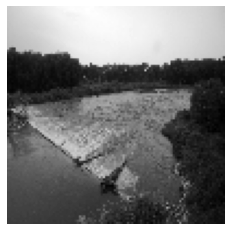

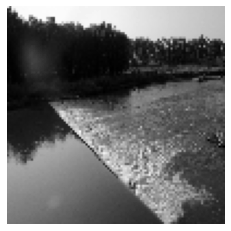

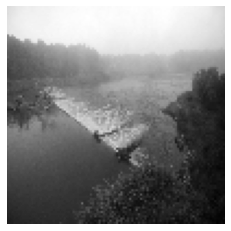

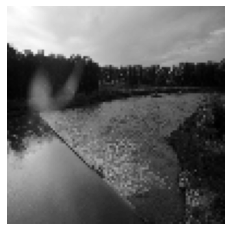

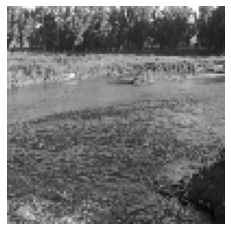

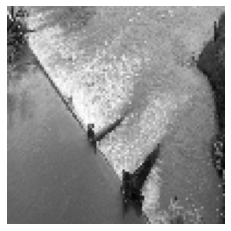

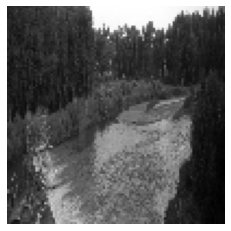

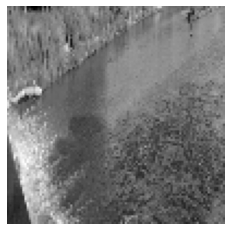

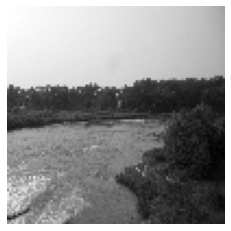

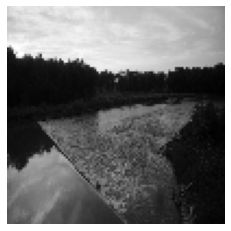

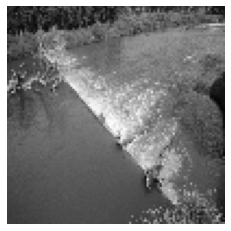

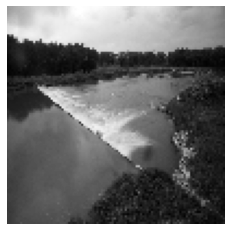

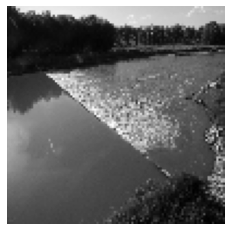

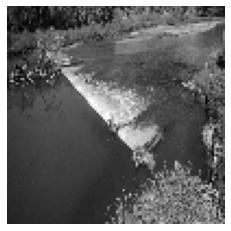

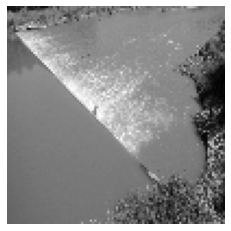

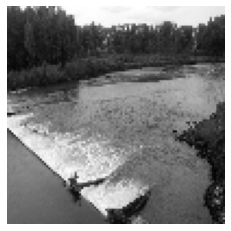

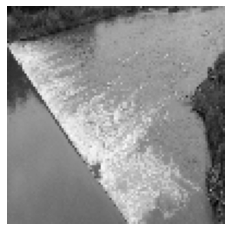

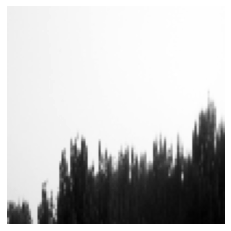

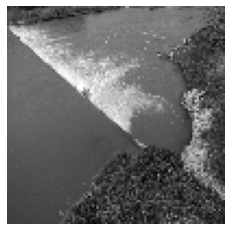

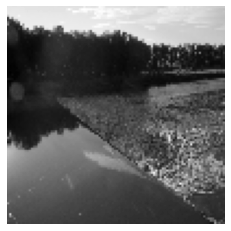

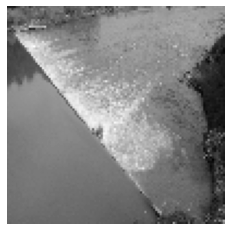

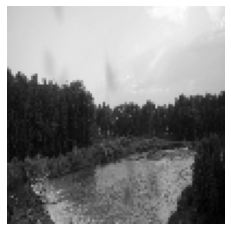

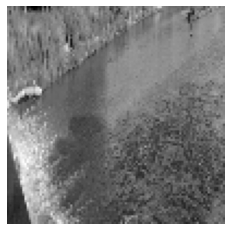

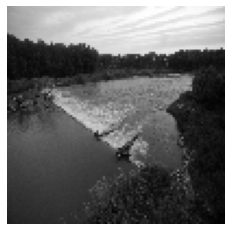

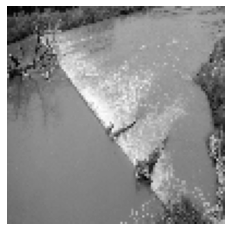

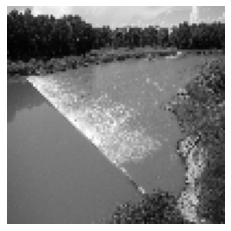

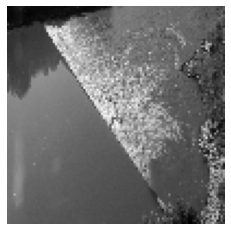

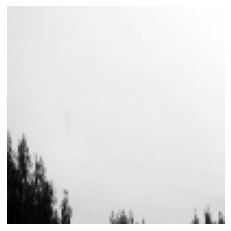

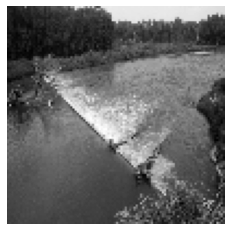

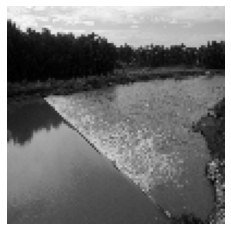

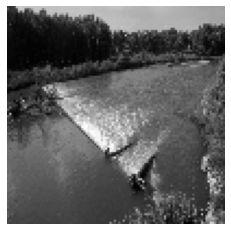

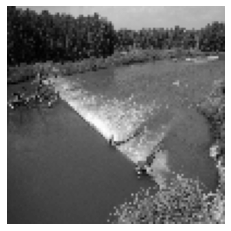

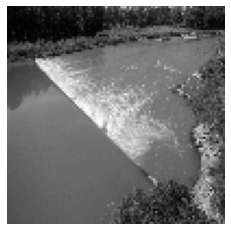

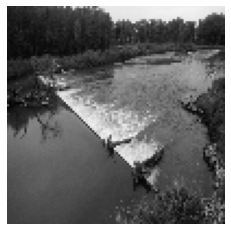

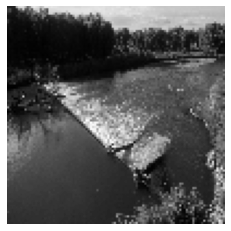

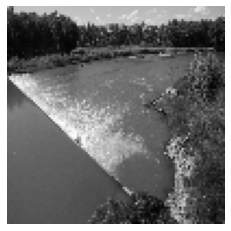

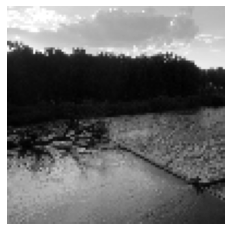

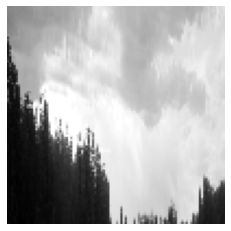

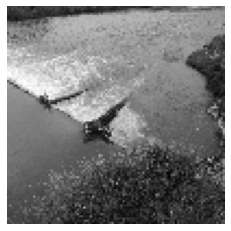

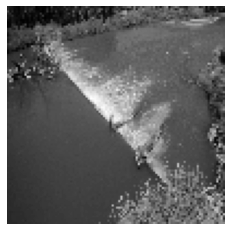

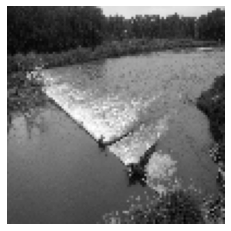

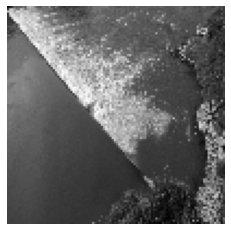

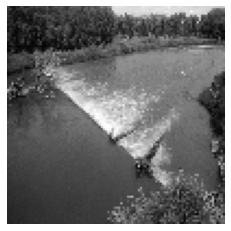

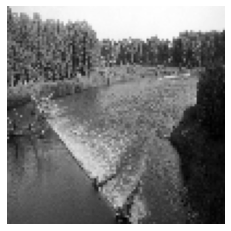

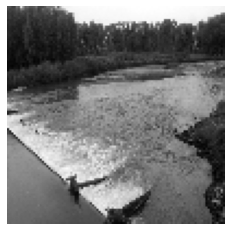

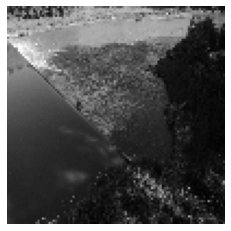

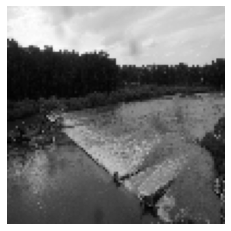

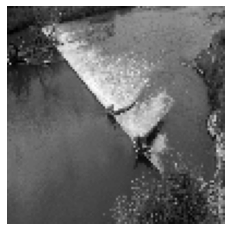

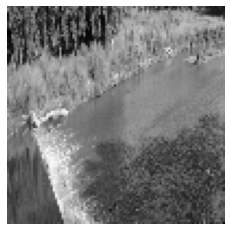

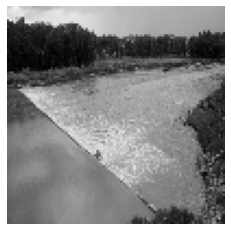

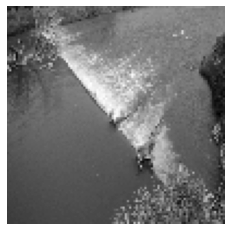

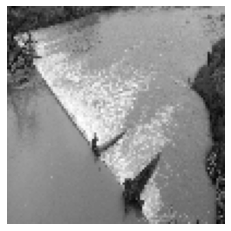

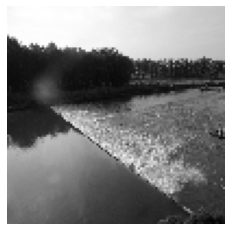

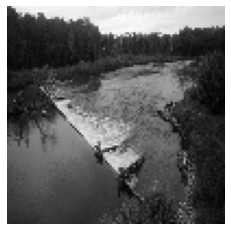

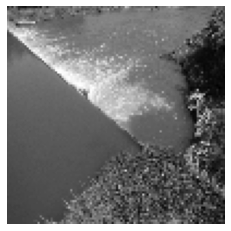

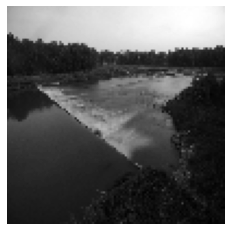

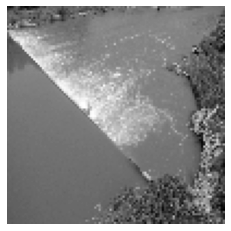

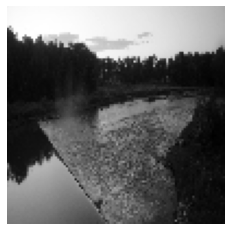

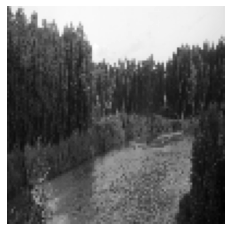

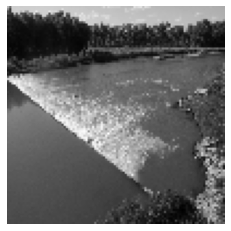

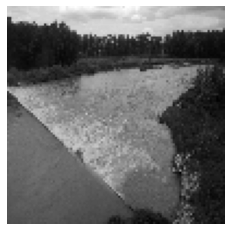

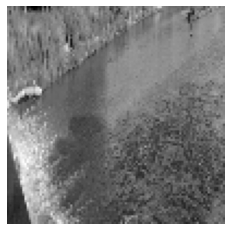

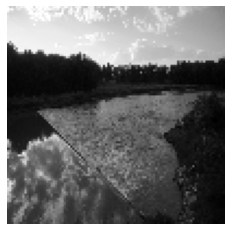

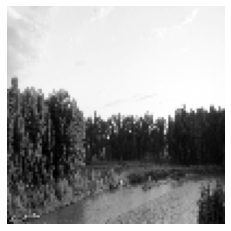

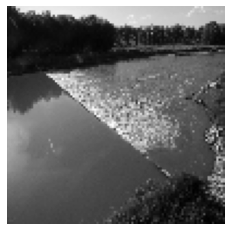

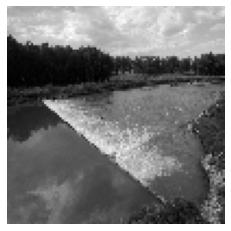

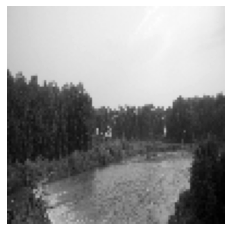

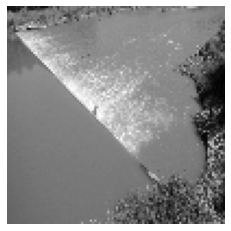

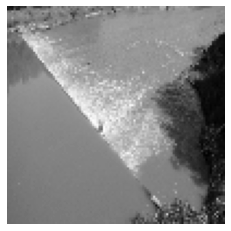

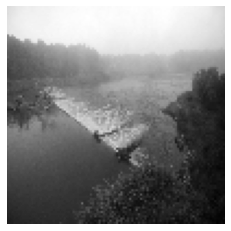

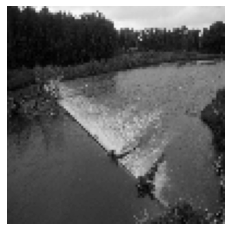

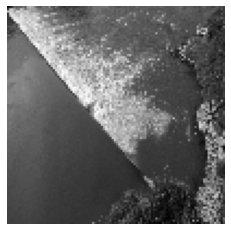

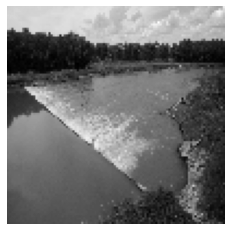

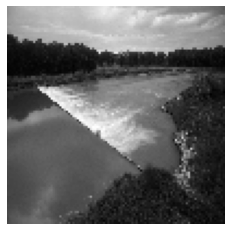

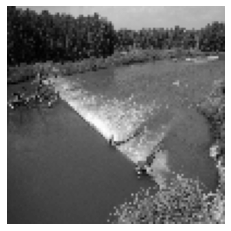

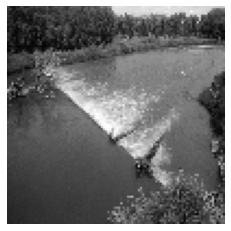

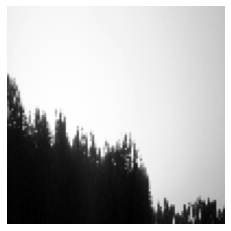

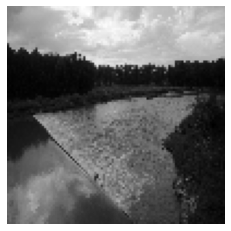

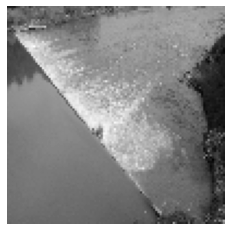

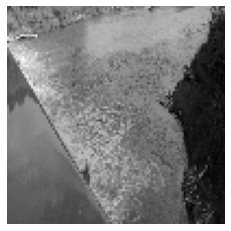

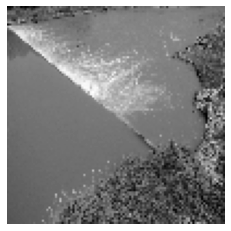

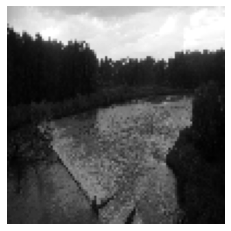

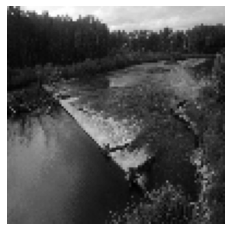

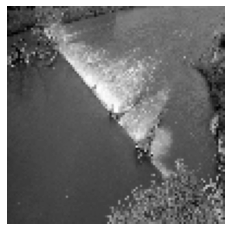

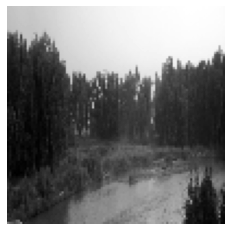

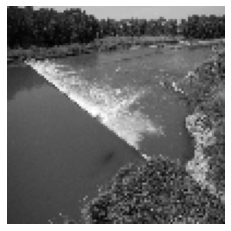

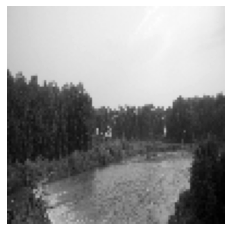

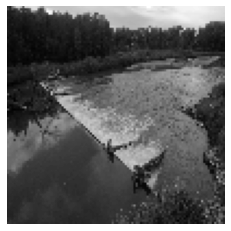

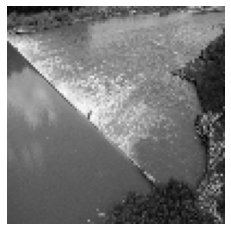

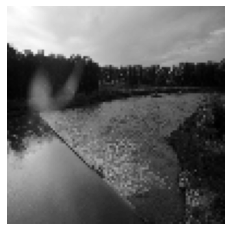

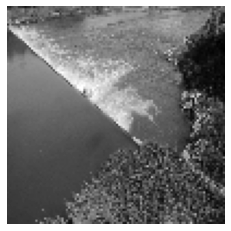

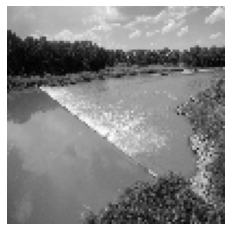

In [24]:
np.random.seed(18)
for i in np.random.randint(0, len(img_array), 100):
    plt.figure()
    plt.imshow(img_array[i].reshape(100, 100), cmap='gray'), plt.axis('off')